# A coffee roasting priblem:
## GOOD versus BAD roast depending on roasting time and temperature

In [15]:
%run src.ipynb

## Creating a roasting training data 

In [18]:
# Taken directly from the course site with minor edits
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        z = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=z ):
            y[i] = 1
        else:
            y[i] = 0
        i += 1
    
    return (X, y)


In [19]:
X, y = load_coffee_data()
print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}")

print(f"X[0:5,:] =\n {X[0:5,:]}")
print(f"y[0:5] =\n {y[0:5]}")

X.shape = (200, 2)
y.shape = (200,)
X[0:5,:] =
 [[185.31763812  12.69396457]
 [259.92047498  11.86766377]
 [231.01357101  14.41424211]
 [175.3666449   11.72058651]
 [187.12086467  14.12973206]]
y[0:5] =
 [1. 0. 0. 0. 1.]


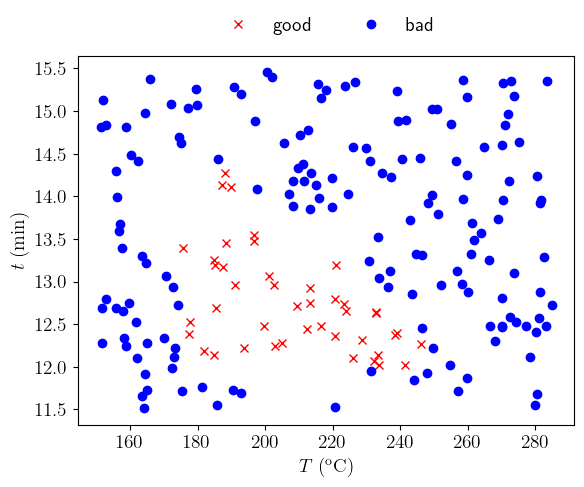

In [20]:
good = y == 1
bad = y == 0
plt.plot(X[good,0],X[good,1],'xr',label='good')
plt.plot(X[bad,0],X[bad,1],'ob',label='bad')
plt.xlabel('$T\;(\mathrm{^oC})$')
plt.ylabel('$t\;(\mathrm{min})$')
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

## Normalize the data using keras

In [21]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X).numpy()

# # alternative approach
# mean = np.mean(X,axis=0)
# std = np.std(X,axis=0)
# Xn = (X-mean)/std

# tile data to increase the dataset
Xt = np.tile(Xn,(1000,1))
yt = np.tile(y,(1000,))  

## Creat a neural network
Let's consider 1 hidden layer with 3 sigmoid units and an output sigmoid layer.

In [22]:
model = Sequential([
    tf.keras.Input(shape=(2,)),
    Dense(units=3, activation='sigmoid', name = "L1"),
    Dense(units=1, activation='sigmoid', name = "L2")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 3)                 9         
                                                                 
 L2 (Dense)                  (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


## Compile with gradient descent and BinaryCrossentropy loss

In [23]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy())
model.fit(
    Xt,yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 4s 628us/step - loss: 0.3515
Epoch 2/10
6250/6250 [==============================] - 4s 634us/step - loss: 0.2062
Epoch 3/10
6250/6250 [==============================] - 4s 624us/step - loss: 0.1627
Epoch 4/10
6250/6250 [==============================] - 4s 628us/step - loss: 0.1530
Epoch 5/10
6250/6250 [==============================] - 4s 634us/step - loss: 0.1491
Epoch 6/10
6250/6250 [==============================] - 4s 627us/step - loss: 0.1467
Epoch 7/10
6250/6250 [==============================] - 4s 630us/step - loss: 0.1449
Epoch 8/10
6250/6250 [==============================] - 4s 609us/step - loss: 0.1435
Epoch 9/10
6250/6250 [==============================] - 4s 622us/step - loss: 0.1423
Epoch 10/10
6250/6250 [==============================] - 4s 649us/step - loss: 0.1412


## Compile with Adam optimization

In [24]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))
model.fit(
    Xt,yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 4s 632us/step - loss: 0.1379
Epoch 2/10
6250/6250 [==============================] - 4s 670us/step - loss: 0.1299
Epoch 3/10
6250/6250 [==============================] - 4s 663us/step - loss: 0.1180
Epoch 4/10
6250/6250 [==============================] - 4s 656us/step - loss: 0.0539
Epoch 5/10
6250/6250 [==============================] - 4s 650us/step - loss: 0.0176
Epoch 6/10
6250/6250 [==============================] - 4s 651us/step - loss: 0.0114
Epoch 7/10
6250/6250 [==============================] - 4s 669us/step - loss: 0.0080
Epoch 8/10
6250/6250 [==============================] - 4s 668us/step - loss: 0.0057
Epoch 9/10
6250/6250 [==============================] - 4s 663us/step - loss: 0.0042
Epoch 10/10
6250/6250 [==============================] - 4s 645us/step - loss: 0.0030


In [25]:
W1, b1 = model.get_layer("L1").get_weights()
W2, b2 = model.get_layer("L2").get_weights()
print("W1 = \n", W1, "\nb1 = ", b1)
print("W2 = \n", W2, "\nb2 = ", b2)

W1 = 
 [[ -0.03552738 -10.556414   -17.23356   ]
 [ -8.38836     -0.16914871 -14.438399  ]] 
b1 =  [-10.489092  -11.594624   -2.5107577]
W2 = 
 [[-41.91532 ]
 [-46.967785]
 [ 32.910355]] 
b2 =  [-9.022997]


## Prediction accuracy

In [26]:
# expect good coffee
T = 220
t = 13
X_testn = norm_l(np.array([[T,t]]))
p = model.predict(X_testn)
print("predictions (expect good) = ", p)

# expect bad coffee
T = 220
t = 15
X_testn = norm_l(np.array([[T,t]]))
p = model.predict(X_testn)
print("predictions (expect bad) = ", p)


1/1 [==============================] - 0s 32ms/step
predictions (expect good) =  [[1.]]
1/1 [==============================] - 0s 13ms/step
predictions (expect bad) =  [[0.00012056]]


In [27]:
p = model.predict(Xn)
prob = np.zeros(len(p))
for i in range(len(p)):
    if p[i] >= 0.5:
        prob[i] = 1
        
print(f"The training accuracy is {np.mean(prob == y)*100}%")

7/7 [==============================] - 0s 757us/step
The training accuracy is 100.0%
